<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

% matplotlib inline

In [196]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])
bos_prices = pd.merge(X,y, left_index=True, right_index=True)

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [197]:
#Shape
bos_prices.shape

(506, 14)

In [198]:
#data types & count of Null values by column
bos_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [199]:
#summary statistics
bos_prices.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [200]:
#unique values by column
bos_prices.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

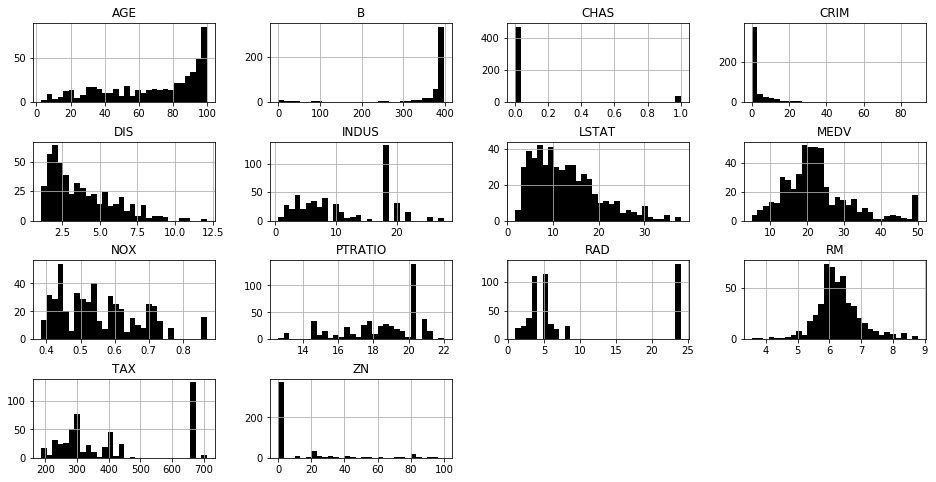

In [201]:
#frequency of distribution. careful when looking at these plots - vertical axis tends to be a higher number for more tightly distributed variables
ax = bos_prices.hist(bins=30, figsize=(16,8), color='k')
plt.subplots_adjust(hspace=.5)

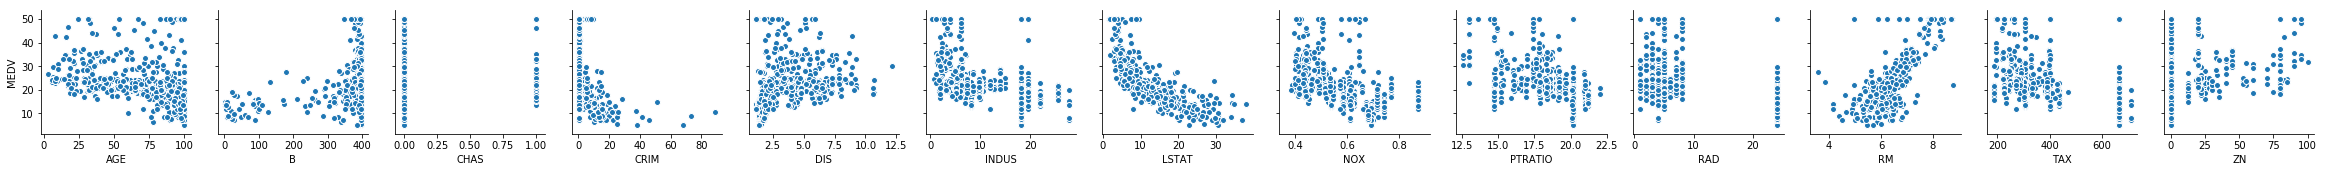

In [276]:
#Plot values against median price
g = sns.pairplot(data=bos_prices, 
                 y_vars='MEDV',
                 x_vars=['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN'])

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [243]:
#multiplied the mean by -1 to return a positive value to properly fit the MSE formula

from sklearn import metrics
y = bos_prices['MEDV']
null_pred = np.zeros(len(y)) - (np.mean(y))*-1
metrics.mean_squared_error(y, null_pred)

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

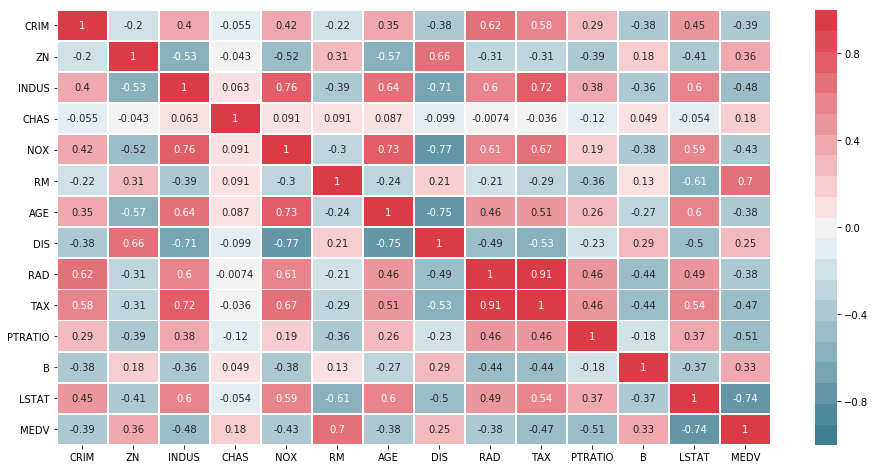

In [204]:
#check to see which variables are most highly correlated with MEDV
#also check to see how correlated they are with each other in order to avoid colinearity

ax = plt.subplots(figsize=(16,8)) 
sns.heatmap(bos_prices.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True, 
            linewidths=.9);

In [475]:
#strongest correlations are RM with .7 and LSTAT with -.74. RM & LSTAT have a .61 correlation, indicating minor colinearity risk
#testing linear regression with rooms & the inverse of lower income status. 

bos_prices['USTAT'] = (100 - bos_prices['LSTAT'])**16


from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

feature_cols = ['USTAT', 'RM']
lr_bos_prices = LinearRegression()

X = bos_prices.loc[:, feature_cols]
y = bos_prices.loc[:, ['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, train_size=.7, test_size=.3)
model = lr_bos_prices.fit(X_train, y_train)
predictions = lr_bos_prices.predict(X_test)
predictions_train = lr_bos_prices.predict(X_train)

print(metrics.mean_squared_error(y_test, predictions))
print(metrics.mean_squared_error(y_train, predictions_train))

27.769353671918996
29.305607303421898


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [476]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=5)

In [477]:
mse_test_values = []
mse_train_values = []
scores = []
n = 0

print("~~~~~ CROSS VALIDATION each fold~~~~~")
for train_index, test_index in kf.split(X,y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index, :])
    
    mse_test_values.append(metrics.mean_squared_error(y.iloc[test_index, :], lr.predict(X.iloc[test_index, :])))
    mse_train_values.append(metrics.mean_squared_error(y.iloc[train_index, :], lr.predict(X.iloc[train_index, :])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('Test MSE: {}'.format(mse_test_values[n-1]))
    print('Train MSE: {}'.format(mse_train_values[n-1]))
    print('R^2: {}\n'.format(scores[n-1]))
    
print("~~~~~SUMMARY OF CROSS VALIDATION~~~~~")
print('Mean of MSE for all test folds: {}'.format(np.mean(mse_test_values)))
print('Mean of MSE for all train folds: {}'.format(np.mean(mse_train_values)))
print('Mean of R^2 for all folds: {}'.format(np.mean(scores)))

~~~~~ CROSS VALIDATION each fold~~~~~
Model 1
Test MSE: 28.659432297298043
Train MSE: 28.55791448312885
R^2: 0.6615932632607688

Model 2
Test MSE: 25.952876114844546
Train MSE: 28.868305874276313
R^2: 0.6615184974685591

Model 3
Test MSE: 37.231990451428416
Train MSE: 27.647900362329754
R^2: 0.6610514550193893

Model 4
Test MSE: 14.416071394893196
Train MSE: 30.16808672498742
R^2: 0.6614477224557294

Model 5
Test MSE: 20.53000493979194
Train MSE: 29.47058542227626
R^2: 0.6615777075560241

Model 6
Test MSE: 26.35252460607923
Train MSE: 28.865358870827283
R^2: 0.6610727381558972

Model 7
Test MSE: 34.48766600225502
Train MSE: 27.92038560355814
R^2: 0.6615792873683455

Model 8
Test MSE: 43.35620715651183
Train MSE: 26.950080873441873
R^2: 0.6615566238679081

Model 9
Test MSE: 29.66017753141189
Train MSE: 28.45536445212206
R^2: 0.6615189841192468

Model 10
Test MSE: 27.798713978146328
Train MSE: 28.654542408023158
R^2: 0.661571611102709

~~~~~SUMMARY OF CROSS VALIDATION~~~~~
Mean of MSE fo

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

MSE on each fold outperformed the null model, resulting in an average MSE across the folds that outperformed the null model. 

Bias: There was a wide range in MSE values across the folds. This could indicate that my model may be a better fit to some sections of the data than others, indicating potentially high bias, though not necessarily exceeding null prediction

Variance: There was a wide range in MSE values across the folds. This could indicate that my model has a high degree of variance due to using multiple variables rather than 1. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

On average, the train set slightly outperformed the test set. Because the training set is larger than the test set in each case, this indicates that the quality of the model improves when we use more data. Because high variance can be solved with the collection of more data, perhaps this model has higher variance than we would like. 

- How much of a bias problem does your model appear to have? Why do you say that?

A moderate bias problem based on the features selected. According to the pairplot above, rooms has more of a straight line relationship than does the low income prevalence number. 

- How much of a variance problem does your model appear to have? Why do you say that?

It appears to have a fairly high variance problem based on the fact that MSE reduces as we use more data. 

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

Original Model [RM, USTAT]: 44.88
VAR1 [RM]: 64.88 (-20.08)
VAR2 [USTAT]: 46.23 (-1.35)

Model got worse on test data by removing variables. Degree of change indicated in ()

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

In [308]:
# A) I did find out that my orignal transformation of lstat to ustat actually yielded no difference
# B) I got the lowest MSE on the test set by raising to LSTAT the 17th power

# KNN Practice

In [309]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [310]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [311]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [324]:
iris['species_num'] = 0
iris.loc[iris['species']=='Iris-setosa','species_num'] = 0
iris.loc[iris['species']=='Iris-versicolor','species_num'] = 1
iris.loc[iris['species']=='Iris-virginica','species_num'] = 2
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [325]:
#data shape, data types, count of nulls by column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
species_num     150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [326]:
#basic summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [327]:
#unique values by column
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

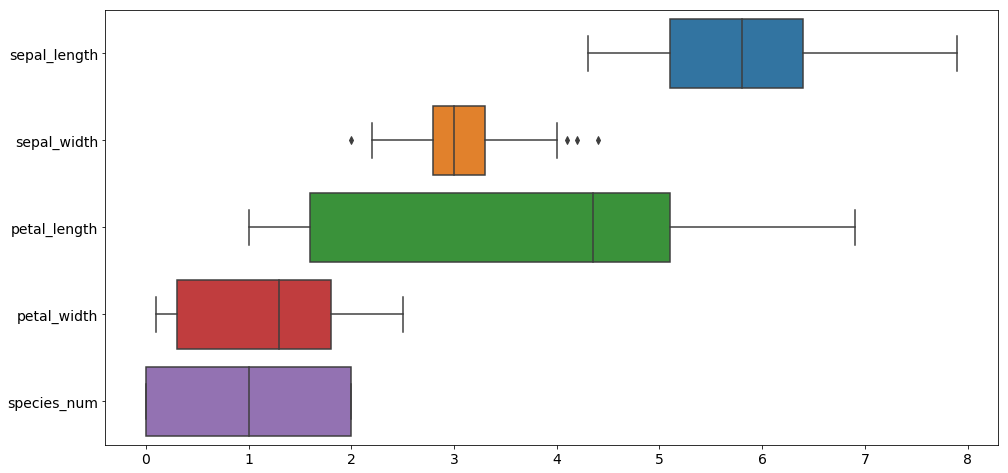

In [340]:
#plotting the distribution of each column
ax = plt.subplots(figsize=(16,8)) 
g = sns.boxplot(data=iris, orient='h')

- Get the accuracy of a null model that simply predicts the most common species.

In [342]:
iris.species.value_counts()
#species are evenly distributed across 3, so null to beat is .33

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [479]:
#import relevant tools 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [544]:
#create feature matrix (X)
feature_cols = iris.columns.drop(['species_num', 'species']).tolist()
X = iris.loc[:, feature_cols]

#create response vector(y)
y = iris.loc[:, 'species_num']

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [546]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_test)


y_pred_train = knn.predict(X_train)
training_accuracy = metrics.accuracy_score(y_train, y_pred_train)

print(testing_accuracy)
print(training_accuracy)

0.9210526315789473
1.0


In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [580]:
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=70)

test_values = []
train_values = []
scores = []
n = 0

print('~~~~~CROSS VALIDATION each fold~~~~~')
for train_index, test_index in kf.split(X, y):
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X.loc[train_index], y.loc[train_index])
    
    test_values.append(metrics.accuracy_score(y.iloc[test_index], knn.predict(X.iloc[test_index, :])))
    train_values.append(metrics.accuracy_score(y.iloc[train_index], knn.predict(X.iloc[train_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('Testing Accuracy: {}'.format(test_values[n-1]))
    print('Training Accuracy: {}\n'.format(train_values[n-1]))

print('Average Testing Accuracy: {}'.format((np.mean(test_values))))
print('Average Training Accuracy: {}'.format((np.mean(train_values))))

~~~~~CROSS VALIDATION each fold~~~~~
Model 1
Testing Accuracy: 1.0
Training Accuracy: 0.9703703703703703

Model 2
Testing Accuracy: 1.0
Training Accuracy: 0.9703703703703703

Model 3
Testing Accuracy: 1.0
Training Accuracy: 0.9777777777777777

Model 4
Testing Accuracy: 1.0
Training Accuracy: 0.9703703703703703

Model 5
Testing Accuracy: 1.0
Training Accuracy: 0.9777777777777777

Model 6
Testing Accuracy: 1.0
Training Accuracy: 0.9703703703703703

Model 7
Testing Accuracy: 0.8666666666666667
Training Accuracy: 0.9703703703703703

Model 8
Testing Accuracy: 0.9333333333333333
Training Accuracy: 0.9851851851851852

Model 9
Testing Accuracy: 0.8666666666666667
Training Accuracy: 0.9851851851851852

Model 10
Testing Accuracy: 1.0
Training Accuracy: 0.9703703703703703

Average Testing Accuracy: 0.9666666666666666
Average Training Accuracy: 0.9748148148148148


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Each run through test data produced significantly better results than null. This model is acceptable for the data

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

On average, the model performed slightly worse than the training set, albeit to a very small degree. This model must be close to optimal for variance and bias

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

variance - it's overfitted to the training data

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

There was an improvement from k=1 to k=5

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [619]:
y = iris['species_num']
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=70)

test_values = []
fold_scores = []
fold_mean = []
x = 0

for k in range(1,113):
    fold_scores = []
    n = 0
    for train, test in kf.split(X, y):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X.loc[train], y.loc[train])
        fold_scores.append(metrics.accuracy_score(y.iloc[test], knn.predict(X.iloc[test, :])))
        
        n += 1
        fold_mean.append(np.mean(fold_scores))
        
    test_values.append([k, fold_mean[x-1]])

In [620]:
fold_mean = pd.DataFrame(test_values, columns=['k', 'score'])
fold_mean.head()

,k,score
0,1,0.960000
1,2,0.960000
2,3,0.966667
3,4,0.966667
4,5,0.966667


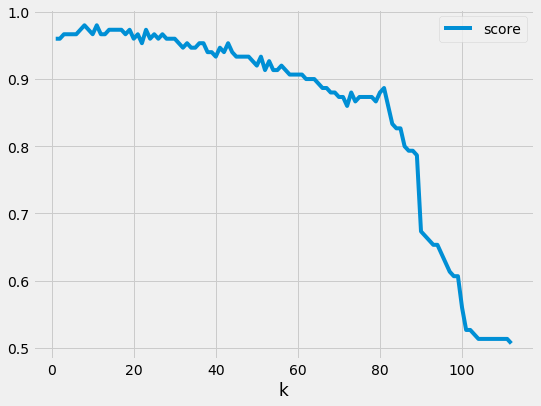

In [621]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')
ax = fold_mean.plot(kind='line', x='k', y='score')

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [622]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [623]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Mon, 13 Aug 2018   Prob (F-statistic):          1.59e-321
Time:                        05:54:27   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [624]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [625]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/BoolCentral/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [626]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.11043944356864677
